# Cleaning of InternationalDeclarations.xes

In [1]:
import pm4py
import matplotlib.pyplot as plt

In [2]:
# Load the XES file and convert it to a DataFrame
xes_filename = '../datasets/InternationalDeclarations.xes'
log = pm4py.read_xes(xes_filename)
df = pm4py.convert_to_dataframe(log)

df['case:id'] = df['case:id'].astype(str) #to reduce errors

df

parsing log, completed traces ::   0%|          | 0/6449 [00:00<?, ?it/s]

id  org:resource  \
0      rv_travel permit 76455_6  STAFF MEMBER   
1      rv_travel permit 76455_7  STAFF MEMBER   
2               st_step 76459_0  STAFF MEMBER   
3               st_step 76460_0  STAFF MEMBER   
4               st_step 76461_0  STAFF MEMBER   
...                         ...           ...   
72146           st_step 13239_0  STAFF MEMBER   
72147           st_step 13241_0  STAFF MEMBER   
72148           st_step 13240_0  STAFF MEMBER   
72149  rv_travel permit 13226_6  STAFF MEMBER   
72150  rv_travel permit 13226_7  STAFF MEMBER   

                                 concept:name            time:timestamp  \
0                                  Start trip 2016-10-05 00:00:00+00:00   
1                                    End trip 2016-10-05 00:00:00+00:00   
2                Permit SUBMITTED by EMPLOYEE 2017-04-06 13:32:10+00:00   
3         Permit FINAL_APPROVED by SUPERVISOR 2017-04-06 13:32:28+00:00   
4           Declaration SUBMITTED by EMPLOYEE 2017-04-07 13:38:14+00:00   
...                                       ...                       ...   
72146       Declaration SUBMITTED by EMPLOYEE 2018-12-18 15:06:50+00:00   
72147  Declaration REJECTED by ADMINISTRATION 2018-12-18 15:06:57+00:00   
72148        Declaration REJECTED by EMPLOYEE 2018-12-19 14:05:36+00:00   
72149                              Start trip 2019-02-19 00:00:00+00:00   
72150                                End trip 2019-02-24 00:00:00+00:00   

             org:role case:Permit travel permit number  \
0            EMPLOYEE       travel permit number 76456   
1            EMPLOYEE       travel permit number 76456   
2            EMPLOYEE       travel permit number 76456   
3          SUPERVISOR       travel permit number 76456   
4            EMPLOYEE       travel permit number 76456   
...               ...                              ...   
72146        EMPLOYEE       travel permit number 13227   
72147  ADMINISTRATION       travel permit number 13227   
72148        EMPLOYEE       travel permit number 13227   
72149        EMPLOYEE       travel permit number 13227   
72150        EMPLOYEE       travel permit number 13227   

         case:DeclarationNumber  case:Amount  case:RequestedAmount  \
0      declaration number 76458    39.664561             39.664561   
1      declaration number 76458    39.664561             39.664561   
2      declaration number 76458    39.664561             39.664561   
3      declaration number 76458    39.664561             39.664561   
4      declaration number 76458    39.664561             39.664561   
...                         ...          ...                   ...   
72146                   UNKNOWN     0.000000              0.000000   
72147                   UNKNOWN     0.000000              0.000000   
72148                   UNKNOWN     0.000000              0.000000   
72149                   UNKNOWN     0.000000              0.000000   
72150                   UNKNOWN     0.000000              0.000000   

      case:Permit TaskNumber  ...  case:concept:name  \
0                    UNKNOWN  ...  declaration 76457   
1                    UNKNOWN  ...  declaration 76457   
2                    UNKNOWN  ...  declaration 76457   
3                    UNKNOWN  ...  declaration 76457   
4                    UNKNOWN  ...  declaration 76457   
...                      ...  ...                ...   
72146               task 427  ...  declaration 13232   
72147               task 427  ...  declaration 13232   
72148               task 427  ...  declaration 13232   
72149               task 427  ...  declaration 13232   
72150               task 427  ...  declaration 13232   

       case:Permit OrganizationalEntity   case:travel permit number  \
0             organizational unit 65458  travel permit number 76456   
1             organizational unit 65458  travel permit number 76456   
2             organizational unit 65458  travel permit number 76456   
3             organizational unit 65458  tra

In [3]:
# Display the DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72151 entries, 0 to 72150
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype              
---  ------                            --------------  -----              
 0   id                                72151 non-null  object             
 1   org:resource                      72151 non-null  object             
 2   concept:name                      72151 non-null  object             
 3   time:timestamp                    72151 non-null  datetime64[ns, UTC]
 4   org:role                          72151 non-null  object             
 5   case:Permit travel permit number  72151 non-null  object             
 6   case:DeclarationNumber            72151 non-null  object             
 7   case:Amount                       72151 non-null  float64            
 8   case:RequestedAmount              72151 non-null  float64            
 9   case:Permit TaskNumber            72151 non-null  object     

In [4]:
# Group by unique ids
unique_cases = df.groupby('case:id').size()

unique_cases

case:id
declaration 1002     10
declaration 10024    12
declaration 10026    12
declaration 10046    10
declaration 10069    10
                     ..
declaration 9934     10
declaration 9945     10
declaration 9955     12
declaration 9968     18
declaration 9995     18
Length: 6449, dtype: int64

In [5]:
# List the columns in the DataFrame
df.columns

Index(['id', 'org:resource', 'concept:name', 'time:timestamp', 'org:role',
       'case:Permit travel permit number', 'case:DeclarationNumber',
       'case:Amount', 'case:RequestedAmount', 'case:Permit TaskNumber',
       'case:Permit BudgetNumber', 'case:OriginalAmount',
       'case:Permit ProjectNumber', 'case:concept:name',
       'case:Permit OrganizationalEntity', 'case:travel permit number',
       'case:Permit RequestedBudget', 'case:id', 'case:Permit ID',
       'case:Permit id', 'case:BudgetNumber', 'case:Permit ActivityNumber',
       'case:AdjustedAmount'],
      dtype='object')

In [6]:
# Number of columns in the DataFrame
df.shape[1]

23

In [7]:
# Count NaN values in each column and calculate their percentage
nan_counts = df.isnull().sum()
total_rows = len(df)
nan_percentages = (nan_counts / total_rows) * 100
print("NaN percentage for each column:\n")
print(nan_percentages)

NaN percentage for each column:

id                                  0.0
org:resource                        0.0
concept:name                        0.0
time:timestamp                      0.0
org:role                            0.0
case:Permit travel permit number    0.0
case:DeclarationNumber              0.0
case:Amount                         0.0
case:RequestedAmount                0.0
case:Permit TaskNumber              0.0
case:Permit BudgetNumber            0.0
case:OriginalAmount                 0.0
case:Permit ProjectNumber           0.0
case:concept:name                   0.0
case:Permit OrganizationalEntity    0.0
case:travel permit number           0.0
case:Permit RequestedBudget         0.0
case:id                             0.0
case:Permit ID                      0.0
case:Permit id                      0.0
case:BudgetNumber                   0.0
case:Permit ActivityNumber          0.0
case:AdjustedAmount                 0.0
dtype: float64


In [8]:
# Count 'UNKNOWN' values in each column of the filtered DataFrame and their percentages
unknown_counts = df.astype(str).apply(lambda col: col.str.count('UNKNOWN').sum())
columns_with_unknown = unknown_counts[unknown_counts > 0]
total_rows = len(df)
unknown_percentages = (columns_with_unknown / total_rows) * 100

print(unknown_percentages)

case:Permit travel permit number     0.302144
case:DeclarationNumber               2.905019
case:Permit TaskNumber              37.690399
case:Permit ProjectNumber           37.568433
case:BudgetNumber                    0.119194
case:Permit ActivityNumber          93.282144
dtype: float64


In [ ]:
# Drop columns with lots of 'UNKNOWN' values
filtered_df = df.drop(columns=["case:Permit ActivityNumber"])

filtered_df

id  org:resource  \
0      rv_travel permit 76455_6  STAFF MEMBER   
1      rv_travel permit 76455_7  STAFF MEMBER   
2               st_step 76459_0  STAFF MEMBER   
3               st_step 76460_0  STAFF MEMBER   
4               st_step 76461_0  STAFF MEMBER   
...                         ...           ...   
72146           st_step 13239_0  STAFF MEMBER   
72147           st_step 13241_0  STAFF MEMBER   
72148           st_step 13240_0  STAFF MEMBER   
72149  rv_travel permit 13226_6  STAFF MEMBER   
72150  rv_travel permit 13226_7  STAFF MEMBER   

                                 concept:name            time:timestamp  \
0                                  Start trip 2016-10-05 00:00:00+00:00   
1                                    End trip 2016-10-05 00:00:00+00:00   
2                Permit SUBMITTED by EMPLOYEE 2017-04-06 13:32:10+00:00   
3         Permit FINAL_APPROVED by SUPERVISOR 2017-04-06 13:32:28+00:00   
4           Declaration SUBMITTED by EMPLOYEE 2017-04-07 13:38:14+00:00   
...                                       ...                       ...   
72146       Declaration SUBMITTED by EMPLOYEE 2018-12-18 15:06:50+00:00   
72147  Declaration REJECTED by ADMINISTRATION 2018-12-18 15:06:57+00:00   
72148        Declaration REJECTED by EMPLOYEE 2018-12-19 14:05:36+00:00   
72149                              Start trip 2019-02-19 00:00:00+00:00   
72150                                End trip 2019-02-24 00:00:00+00:00   

             org:role case:Permit travel permit number  \
0            EMPLOYEE       travel permit number 76456   
1            EMPLOYEE       travel permit number 76456   
2            EMPLOYEE       travel permit number 76456   
3          SUPERVISOR       travel permit number 76456   
4            EMPLOYEE       travel permit number 76456   
...               ...                              ...   
72146        EMPLOYEE       travel permit number 13227   
72147  ADMINISTRATION       travel permit number 13227   
72148        EMPLOYEE       travel permit number 13227   
72149        EMPLOYEE       travel permit number 13227   
72150        EMPLOYEE       travel permit number 13227   

         case:DeclarationNumber  case:Amount  case:RequestedAmount  \
0      declaration number 76458    39.664561             39.664561   
1      declaration number 76458    39.664561             39.664561   
2      declaration number 76458    39.664561             39.664561   
3      declaration number 76458    39.664561             39.664561   
4      declaration number 76458    39.664561             39.664561   
...                         ...          ...                   ...   
72146                   UNKNOWN     0.000000              0.000000   
72147                   UNKNOWN     0.000000              0.000000   
72148                   UNKNOWN     0.000000              0.000000   
72149                   UNKNOWN     0.000000              0.000000   
72150                   UNKNOWN     0.000000              0.000000   

      case:Permit TaskNumber  ... case:Permit ProjectNumber  \
0                    UNKNOWN  ...                   UNKNOWN   
1                    UNKNOWN  ...                   UNKNOWN   
2                    UNKNOWN  ...                   UNKNOWN   
3                    UNKNOWN  ...                   UNKNOWN   
4                    UNKNOWN  ...                   UNKNOWN   
...                      ...  ...                       ...   
72146               task 427  ...             project 13228   
72147               task 427  ...             project 13228   
72148               task 427  ...             project 13228   
72149               task 427  ...             project 13228   
72150               task 427  ...             project 13228   

       case:concept:name case:Permit OrganizationalEntity  \
0      declaration 76457        organizational unit 65458   
1      declaration 76457        organizational unit 65458   
2      declaration 76457        organizational unit 65458   


In [ ]:
# Compute variants paths and their durations

variants_df = pm4py.get_variants_paths_duration(
    df,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

# Dataframe with sorting of the variants
variants = variants_df.groupby('@@variant_column').agg({'@@variant_count': 'first'}).reset_index()

# Sorting the DataFrame by '@@variant_count' column in descending order
variants = variants.sort_values(by='@@variant_count', ascending=False).reset_index(drop=True) # This resets the index after sorting. drop=True ensures the old index is not added as a new column.

len(variants)

753

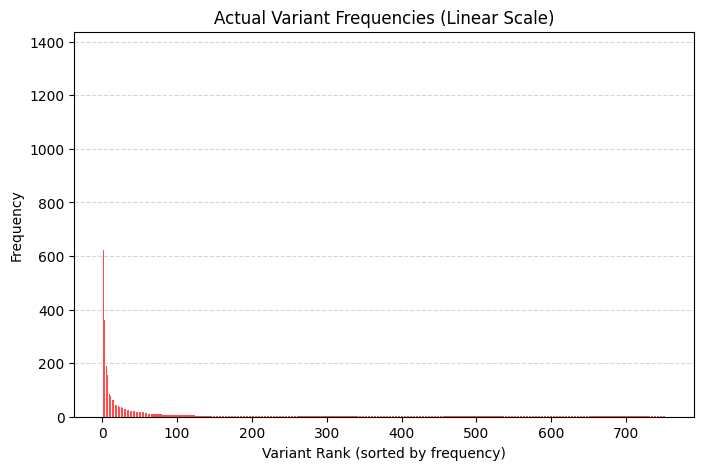

In [11]:
# Create a variable for the distribution 
distribution = variants['@@variant_count']

# Raw Frequency Plot (Linear Scale)
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(distribution)+1), distribution, color='red', alpha=0.7)
plt.title("Actual Variant Frequencies (Linear Scale)")
plt.xlabel("Variant Rank (sorted by frequency)")
plt.ylabel("Frequency")
plt.grid(True, axis='y', ls="--", alpha=0.5)
plt.show()

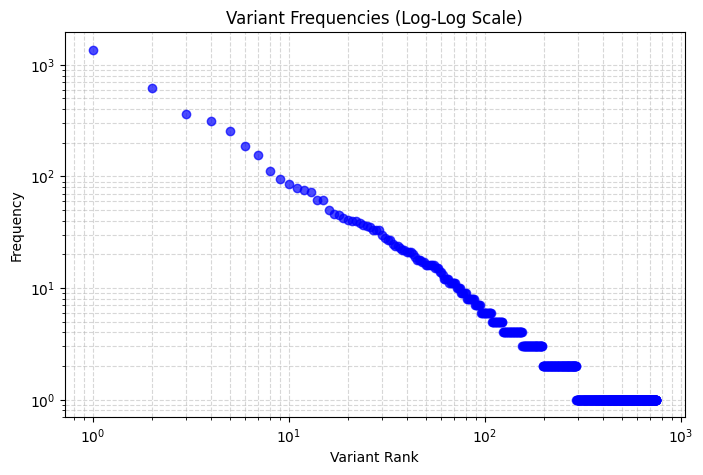

In [12]:
# Log-Log Plot
plt.figure(figsize=(8, 5))
plt.loglog(range(1, len(distribution)+1), distribution, 'bo', alpha=0.7)
plt.title("Variant Frequencies (Log-Log Scale)")
plt.xlabel("Variant Rank")
plt.ylabel("Frequency")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()

In [ ]:
# Display the top N variants
top_n = 10
print(top_n, " more frequent variants")
print(variants.head(top_n))

# Evaluate the coverage of the top N variants
total_cases = variants['@@variant_count'].sum()
cases_in_top_n = variants['@@variant_count'].head(top_n).sum()
percentage_coverage = (cases_in_top_n / total_cases) * 100
print(f"\nTop {top_n} variants cover {percentage_coverage:.2f}% of total cases")

10  more frequent variants
                                    @@variant_column  @@variant_count
0  (Permit SUBMITTED by EMPLOYEE, Permit APPROVED...             1369
1  (Permit SUBMITTED by EMPLOYEE, Permit APPROVED...              624
2  (Permit SUBMITTED by EMPLOYEE, Permit FINAL_AP...              361
3  (Permit SUBMITTED by EMPLOYEE, Permit APPROVED...              311
4  (Permit SUBMITTED by EMPLOYEE, Permit APPROVED...              254
5  (Permit SUBMITTED by EMPLOYEE, Permit APPROVED...              188
6  (Start trip, End trip, Permit SUBMITTED by EMP...              157
7  (Declaration SUBMITTED by EMPLOYEE, Declaratio...              111
8  (Permit SUBMITTED by EMPLOYEE, Permit APPROVED...               94
9  (Permit SUBMITTED by EMPLOYEE, Permit APPROVED...               85

Top 10 variants cover 55.11% of total cases


In [14]:
# Add a new DataFrame to store the durations of each case
filtered_df_dur = filtered_df.copy()

# Min and Max Timestamps for Case Durations
min_timestamps = filtered_df_dur.groupby('case:id')['time:timestamp'].min()
max_timestamps = filtered_df_dur.groupby('case:id')['time:timestamp'].max()

# Case Durations as Timedelta and convert to seconds
case_durations_timedelta = max_timestamps - min_timestamps
case_durations_seconds = case_durations_timedelta.dt.total_seconds()

# Mapping, conversion and new columns
filtered_df_dur.loc[:, 'case_duration_seconds'] = filtered_df_dur['case:id'].map(case_durations_seconds)
filtered_df_dur.loc[:, 'case_duration_minutes'] = filtered_df_dur['case_duration_seconds'] / 60
filtered_df_dur.loc[:, 'case_duration_hours'] = filtered_df_dur['case_duration_seconds'] / 3600
filtered_df_dur.loc[:, 'case_duration_days'] = filtered_df_dur['case_duration_seconds'] / (24 * 3600)

# Statistics for case durations
print(f"Mean duration (days): {filtered_df_dur['case_duration_days'].mean():.2f}")
print(f"Median duration (days): {filtered_df_dur['case_duration_days'].median():.2f}")
print(f"Max duration (days): {filtered_df_dur['case_duration_days'].max():.2f}")
print(f"Min duration (days): {filtered_df_dur['case_duration_days'].min():.2f}")
print(f"N° of Nan created: {filtered_df_dur['case_duration_seconds'].isna().sum()}")

Mean duration (days): 85.16
Median duration (days): 66.76
Max duration (days): 742.00
Min duration (days): 6.73
N° of Nan created: 0


In [15]:
# Find the number of cases with zero duration
zero_duration_cases_count = (filtered_df_dur['case_duration_seconds'] == 0).sum()

print(f"Number of cases with zero duration (seconds): {zero_duration_cases_count}")

Number of cases with zero duration (seconds): 0


In [16]:
# Get the start activities of the cases

start_activities = pm4py.get_start_activities(
    filtered_df_dur,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

start_activities

{'Start trip': 740,
 'Declaration SUBMITTED by EMPLOYEE': 407,
 'Permit SUBMITTED by EMPLOYEE': 5294,
 'Declaration SAVED by EMPLOYEE': 8}

In [17]:
# Filter out specific start activities that are not relevant for analysis

activities_to_exclude = ['Declaration SAVED by EMPLOYEE']

filtered_df_dur = pm4py.filter_start_activities(
    filtered_df_dur,
    activities_to_exclude,
    retain=False,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

start_activities = pm4py.get_start_activities(
    filtered_df_dur,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

start_activities

{'Start trip': 740,
 'Declaration SUBMITTED by EMPLOYEE': 407,
 'Permit SUBMITTED by EMPLOYEE': 5294}

In [18]:
# Get the end activities of the cases

end_activities = pm4py.get_end_activities(
    filtered_df_dur,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

end_activities

{'Payment Handled': 5646,
 'End trip': 585,
 'Declaration SAVED by EMPLOYEE': 54,
 'Permit REJECTED by MISSING': 8,
 'Declaration REJECTED by MISSING': 11,
 'Declaration REJECTED by EMPLOYEE': 130,
 'Declaration FINAL_APPROVED by SUPERVISOR': 1,
 'Send Reminder': 2,
 'Request Payment': 3,
 'Declaration REJECTED by SUPERVISOR': 1}

In [19]:
# Filter out specific end activities that are not relevant for analysis

activities_to_exclude = ['Declaration SAVED by EMPLOYEE', 'Permit REJECTED by MISSING', 'Declaration REJECTED by MISSING', 'Declaration FINAL_APPROVED by SUPERVISOR', 'Send Reminder', 'Request Payment', 'Declaration REJECTED by SUPERVISOR']

filtered_df_dur = pm4py.filter_end_activities(
    filtered_df_dur,
    activities_to_exclude,
    retain=False,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

end_activities = pm4py.get_end_activities(
    filtered_df_dur,
    activity_key='concept:name',
    case_id_key='case:id',
    timestamp_key='time:timestamp'
)

end_activities

{'Payment Handled': 5646,
 'End trip': 585,
 'Declaration REJECTED by EMPLOYEE': 130}

In [20]:
# Compute frequency of activities
activity_counts = filtered_df_dur["concept:name"].value_counts().sort_values(ascending=True)
print("Frequency of Activities:\n", activity_counts)

Frequency of Activities:
 concept:name
Permit REJECTED by DIRECTOR                    1
Declaration REJECTED by DIRECTOR               4
Declaration SAVED by EMPLOYEE                 10
Permit REJECTED by PRE_APPROVER               25
Permit REJECTED by BUDGET OWNER               31
Permit REJECTED by MISSING                    35
Declaration REJECTED by BUDGET OWNER          40
Declaration REJECTED by PRE_APPROVER          82
Permit REJECTED by ADMINISTRATION             83
Declaration REJECTED by MISSING               89
Permit REJECTED by SUPERVISOR                 92
Declaration REJECTED by SUPERVISOR           125
Permit REJECTED by EMPLOYEE                  231
Declaration FINAL_APPROVED by DIRECTOR       252
Declaration APPROVED by SUPERVISOR           256
Send Reminder                                415
Permit APPROVED by PRE_APPROVER              519
Declaration APPROVED by PRE_APPROVER         601
Permit FINAL_APPROVED by DIRECTOR            634
Permit APPROVED by SUPERVISOR 

In [21]:
# Filter out activities that are not relevant for analysis based on their frequency

# Identify activities that are rare (frequency < 1000)
rare_activities_to_remove_cases = activity_counts[activity_counts < 1000].index.tolist()
print(f"Number of activities considered 'rare' (frequency < 1000): {len(rare_activities_to_remove_cases)}")

# Find all 'case:id's that contain at least one of these rare activities
cases_with_rare_activities_events = filtered_df_dur[
    filtered_df_dur['concept:name'].isin(rare_activities_to_remove_cases)
]

# Extract the unique 'case:id's from these cases
case_ids_to_remove = cases_with_rare_activities_events['case:id'].unique()
print(f"\nNumber of cases that will be removed: {len(case_ids_to_remove)}")

# Filter the DataFrame to remove all rows corresponding to these cases, creating a new DataFrame
filtered_df_cases_by_activities = filtered_df_dur[
    ~filtered_df_dur['case:id'].isin(case_ids_to_remove) # ~ negates the condition to keep only those cases not in the list
].copy()

print(f"\nOriginal DataFrame rows: {len(filtered_df_dur)}")
print(f"Filtered DataFrame rows: {len(filtered_df_cases_by_activities)}")
print(f"Number of unique cases in original DataFrame: {filtered_df_dur['case:id'].nunique()}")
print(f"Number of unique cases in filtered DataFrame: {filtered_df_cases_by_activities['case:id'].nunique()}")

Number of activities considered 'rare' (frequency < 1000): 20

Number of cases that will be removed: 1904

Original DataFrame rows: 71544
Filtered DataFrame rows: 48045
Number of unique cases in original DataFrame: 6361
Number of unique cases in filtered DataFrame: 4457


In [ ]:
# Create a copy of the filtered DataFrame for further analysis
df_cleaned = filtered_df_cases_by_activities.copy()

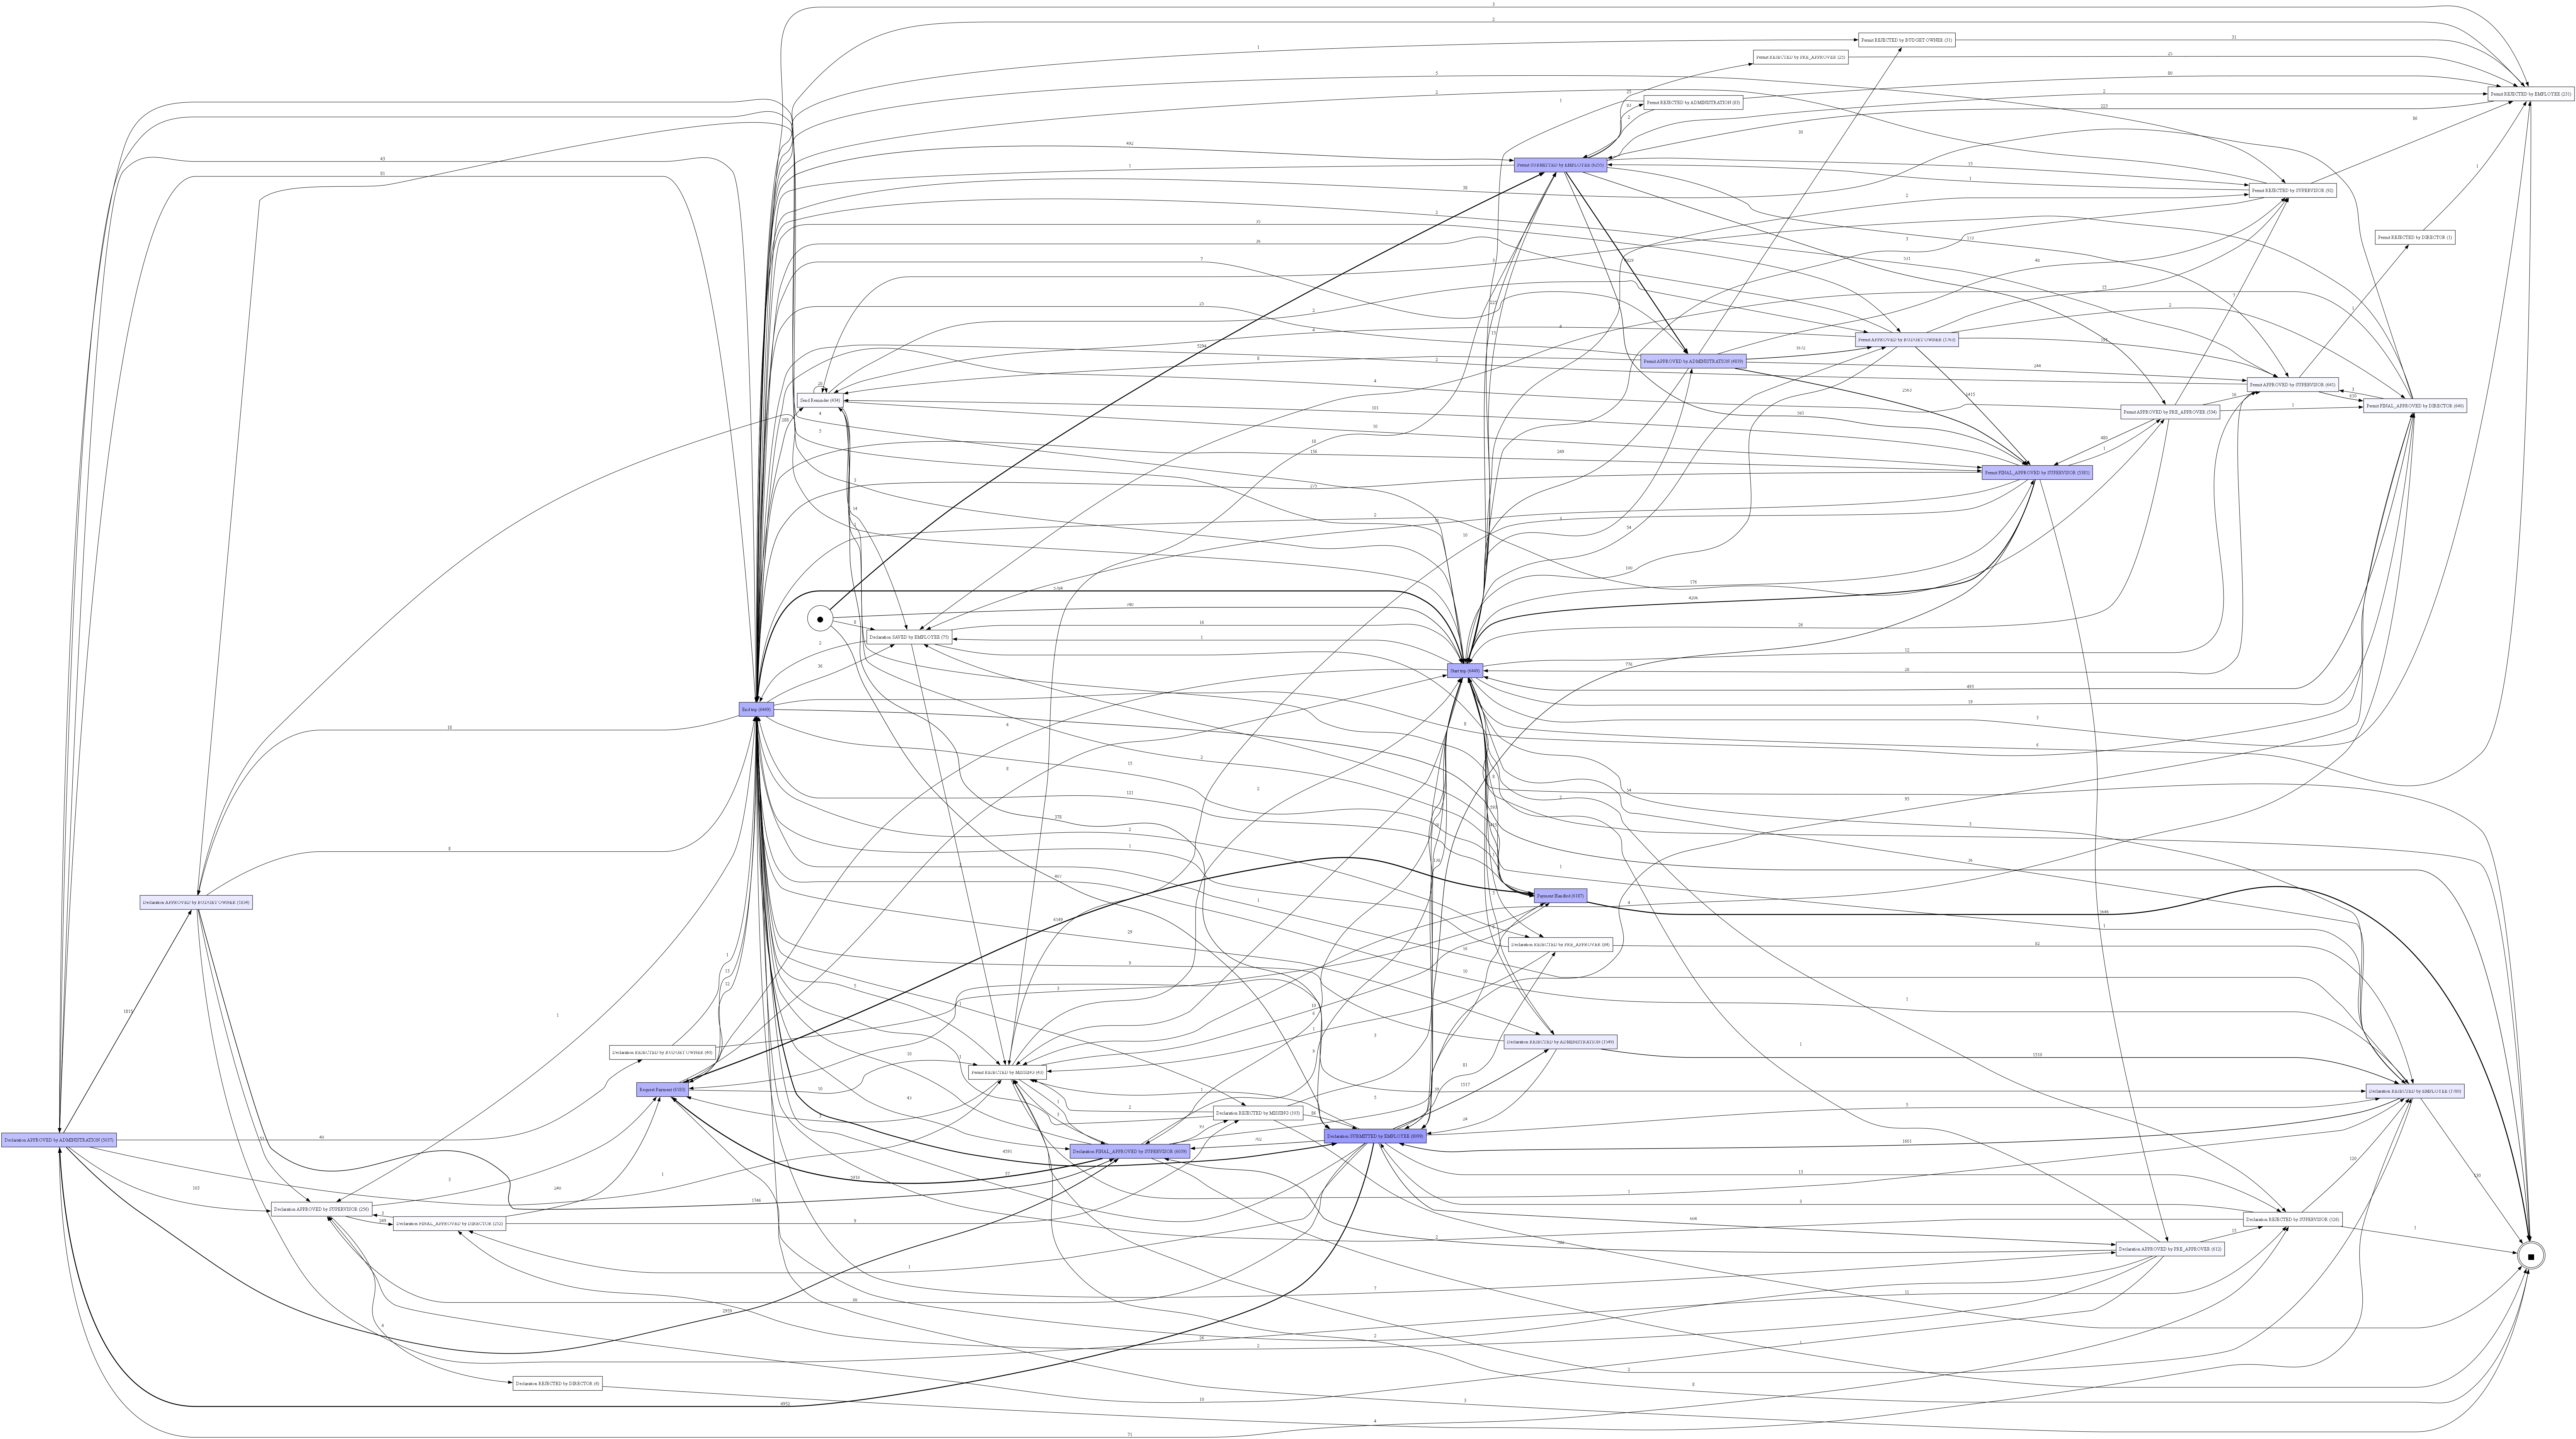

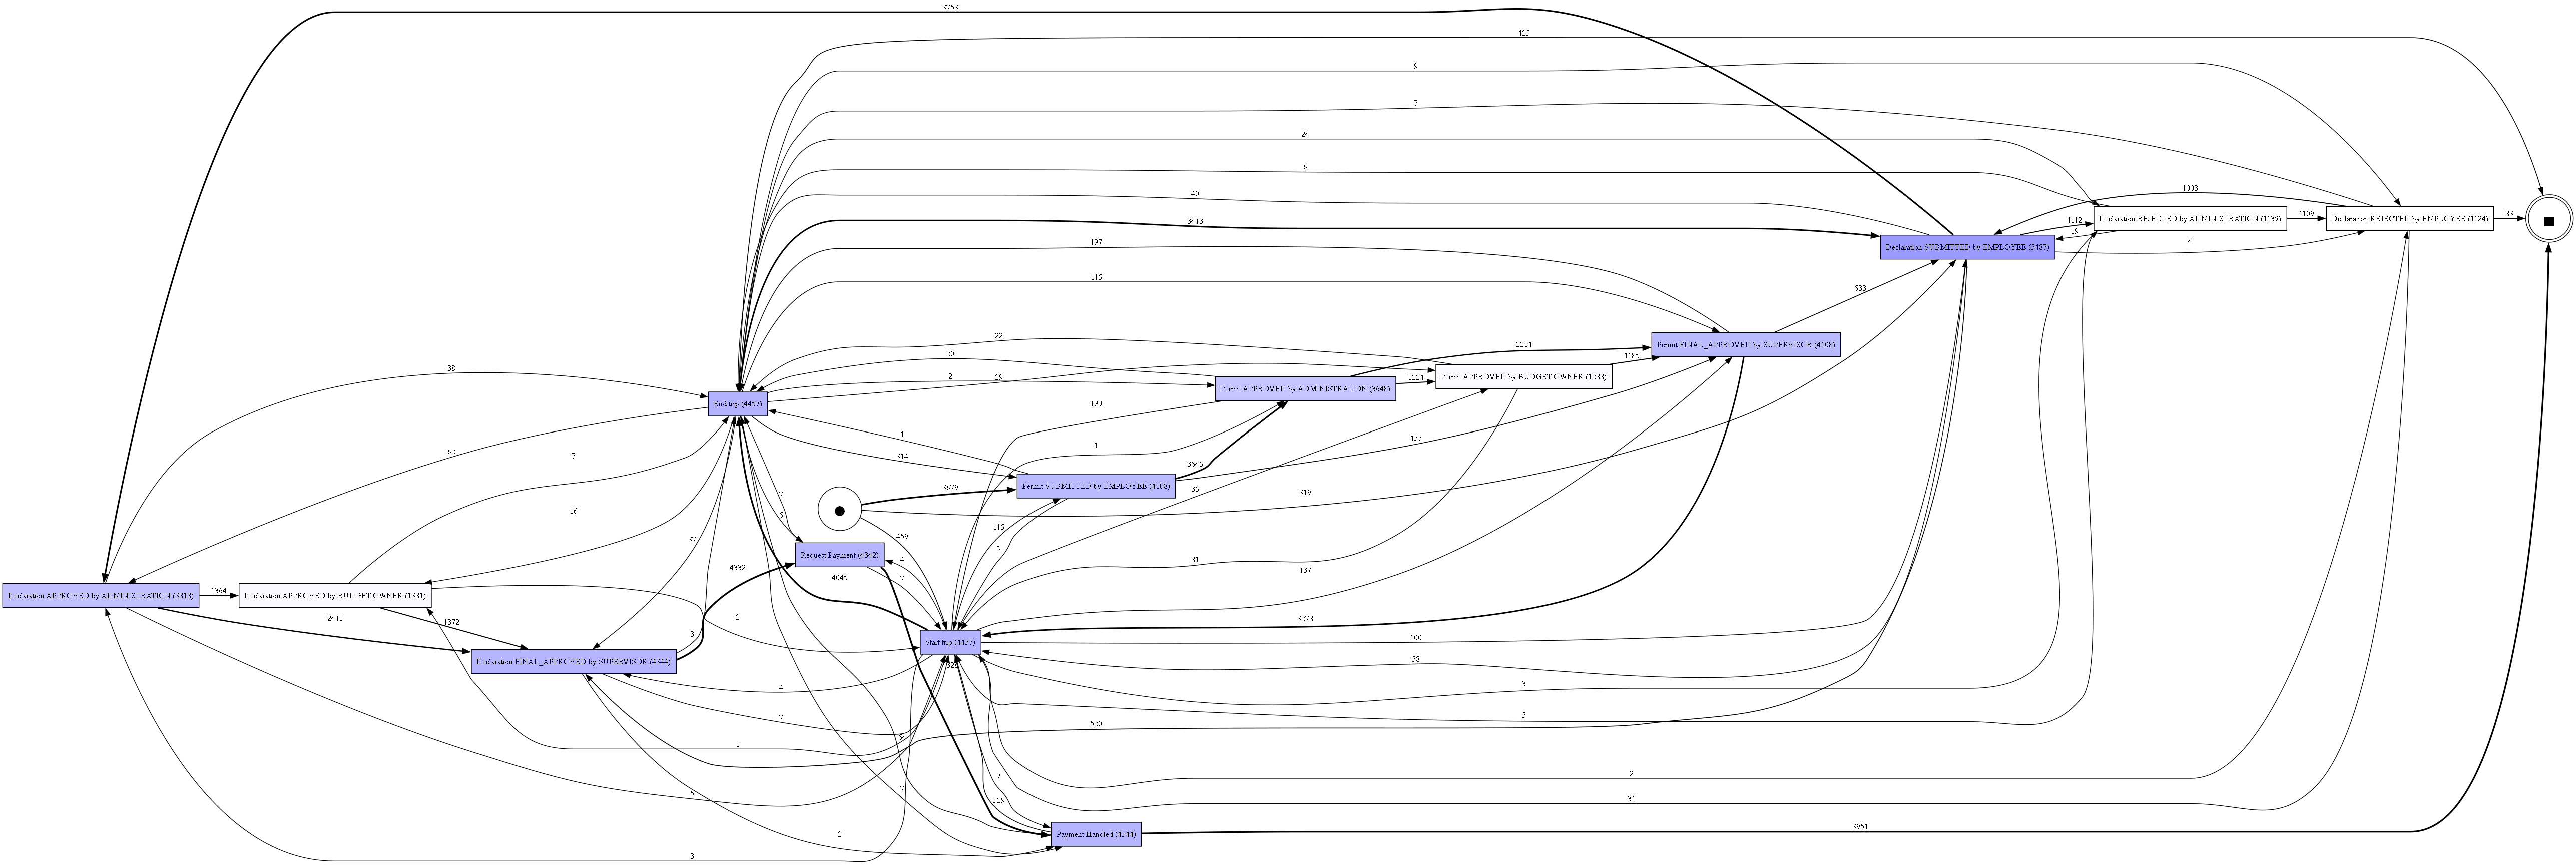

In [ ]:
# Directly Follows Graph (DFG)

# Create graph from original DF and visualise it
dfg, start_activities, end_activities = pm4py.discover_dfg(df)
pm4py.view_dfg(dfg, start_activities, end_activities)

# Create graph from filtered DF and visualise it
dfg, start_activities, end_activities = pm4py.discover_dfg(df_cleaned)
pm4py.view_dfg(dfg, start_activities, end_activities)

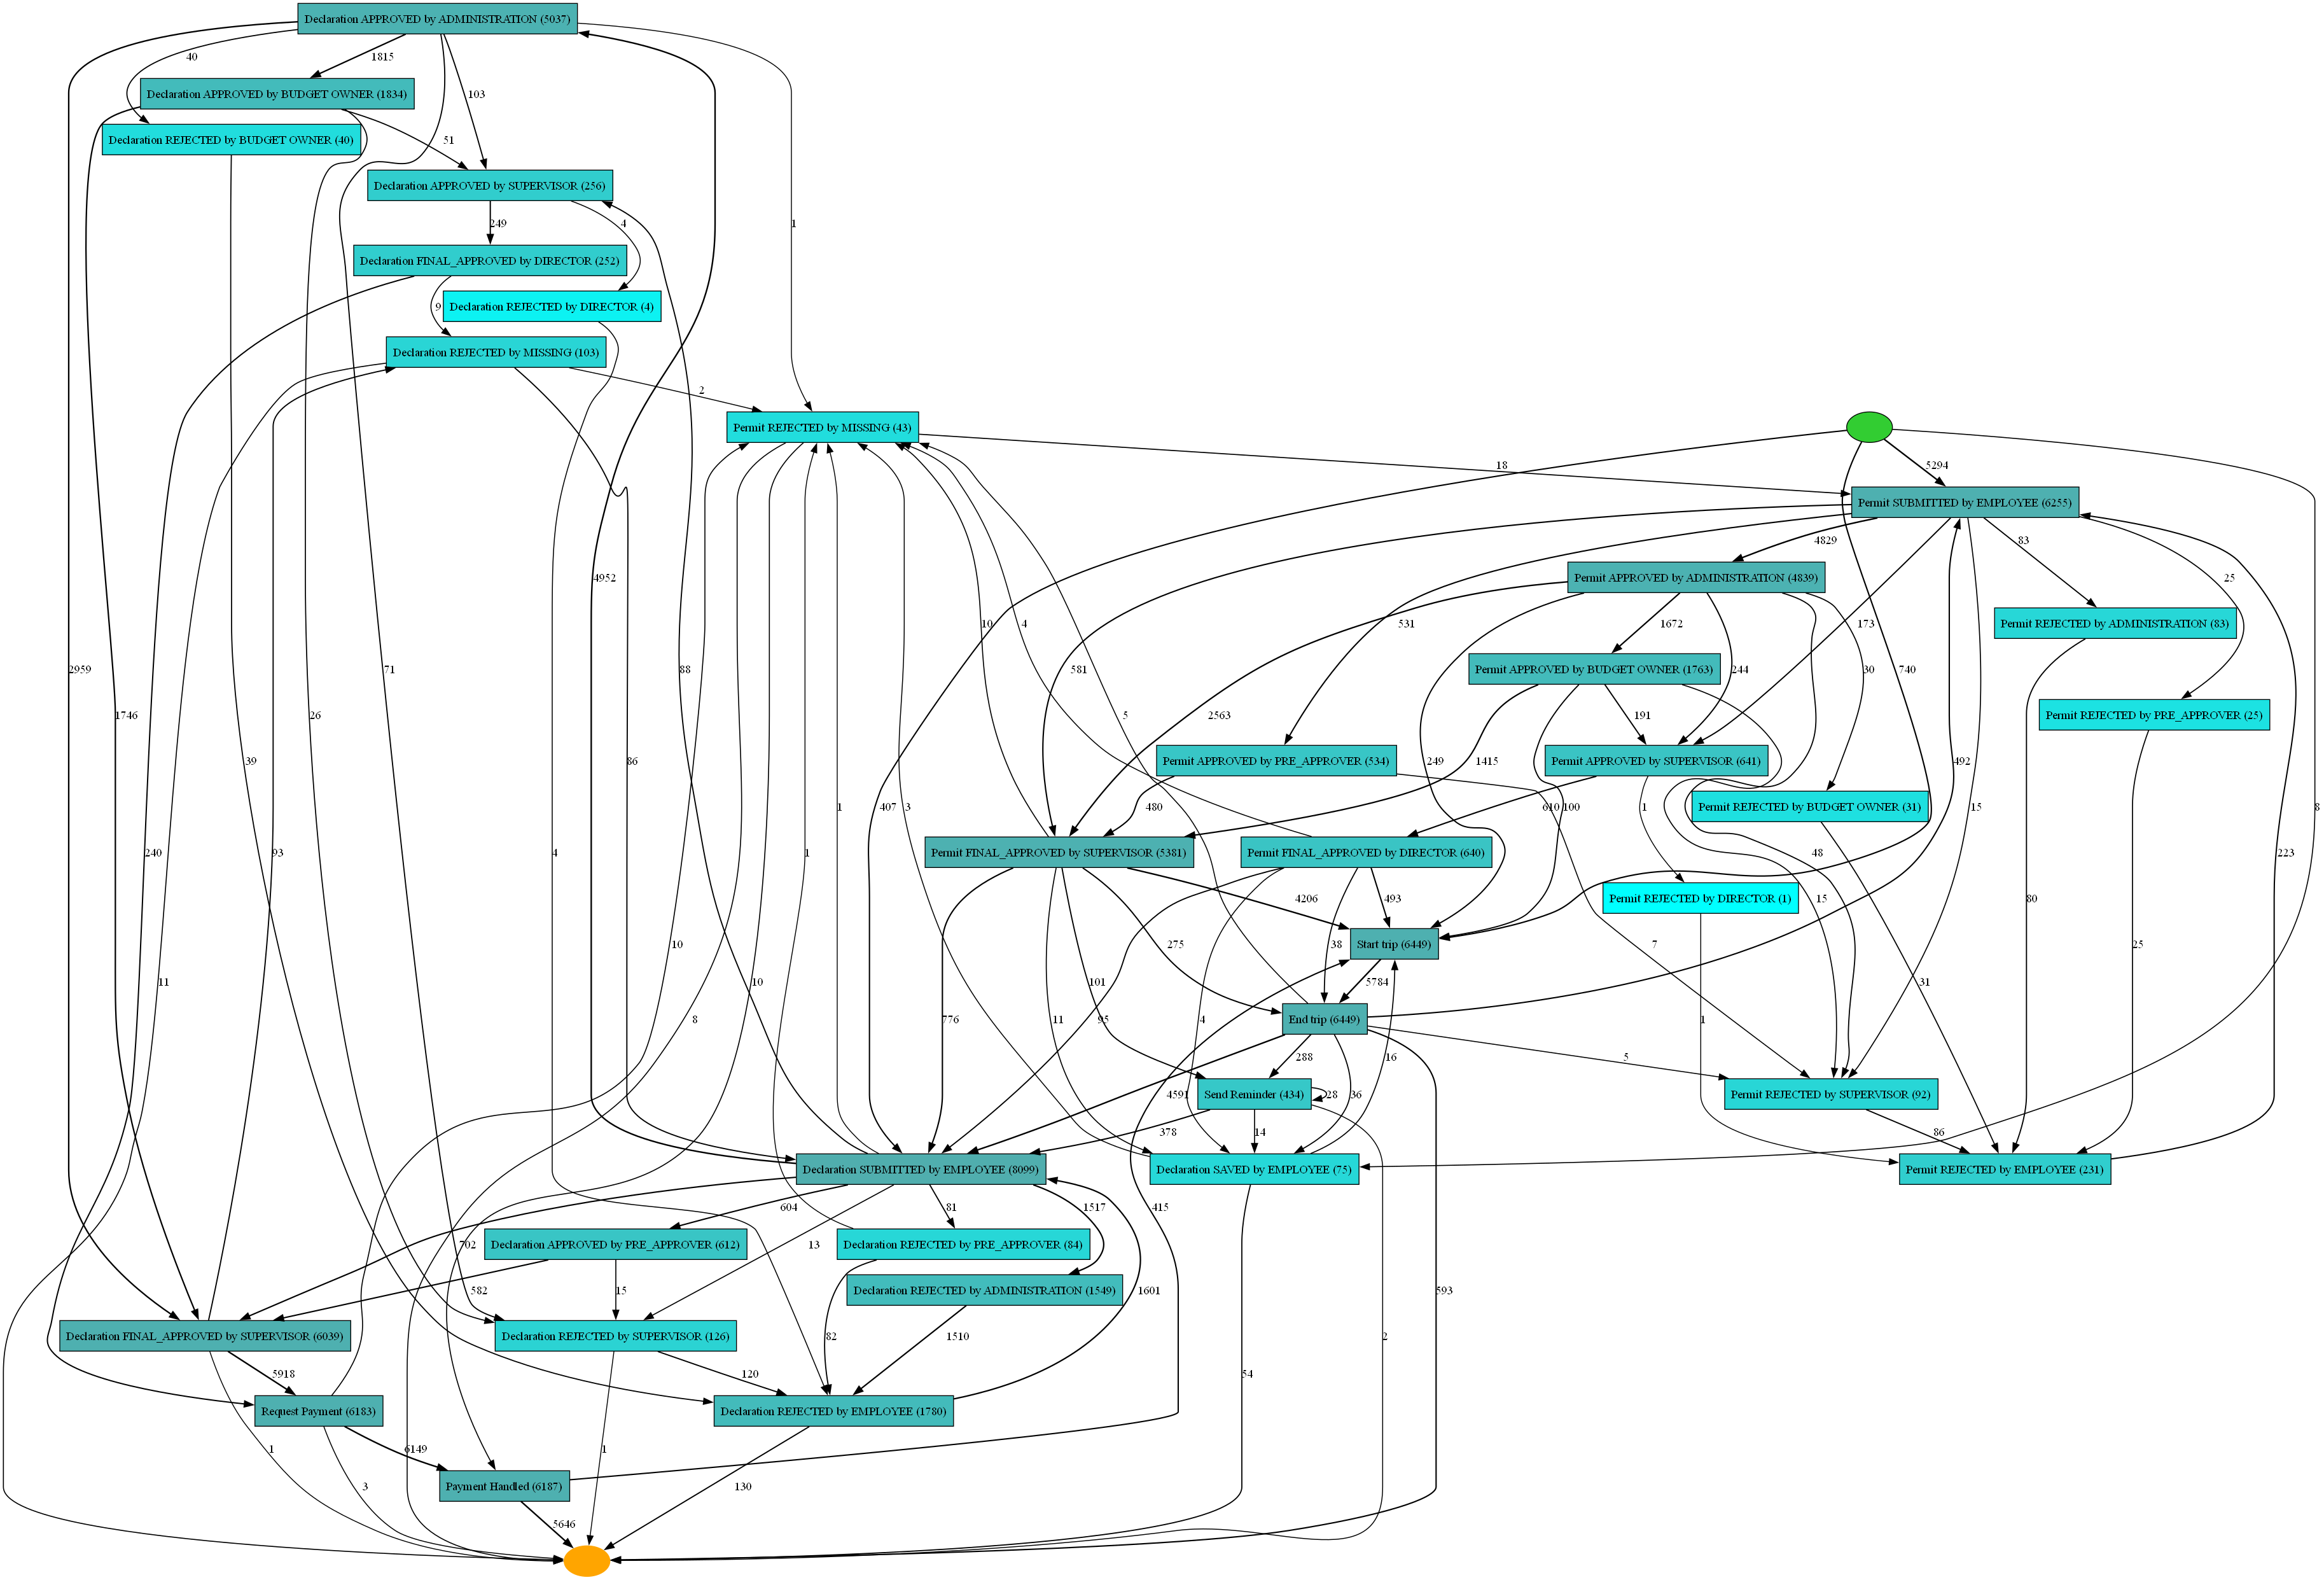

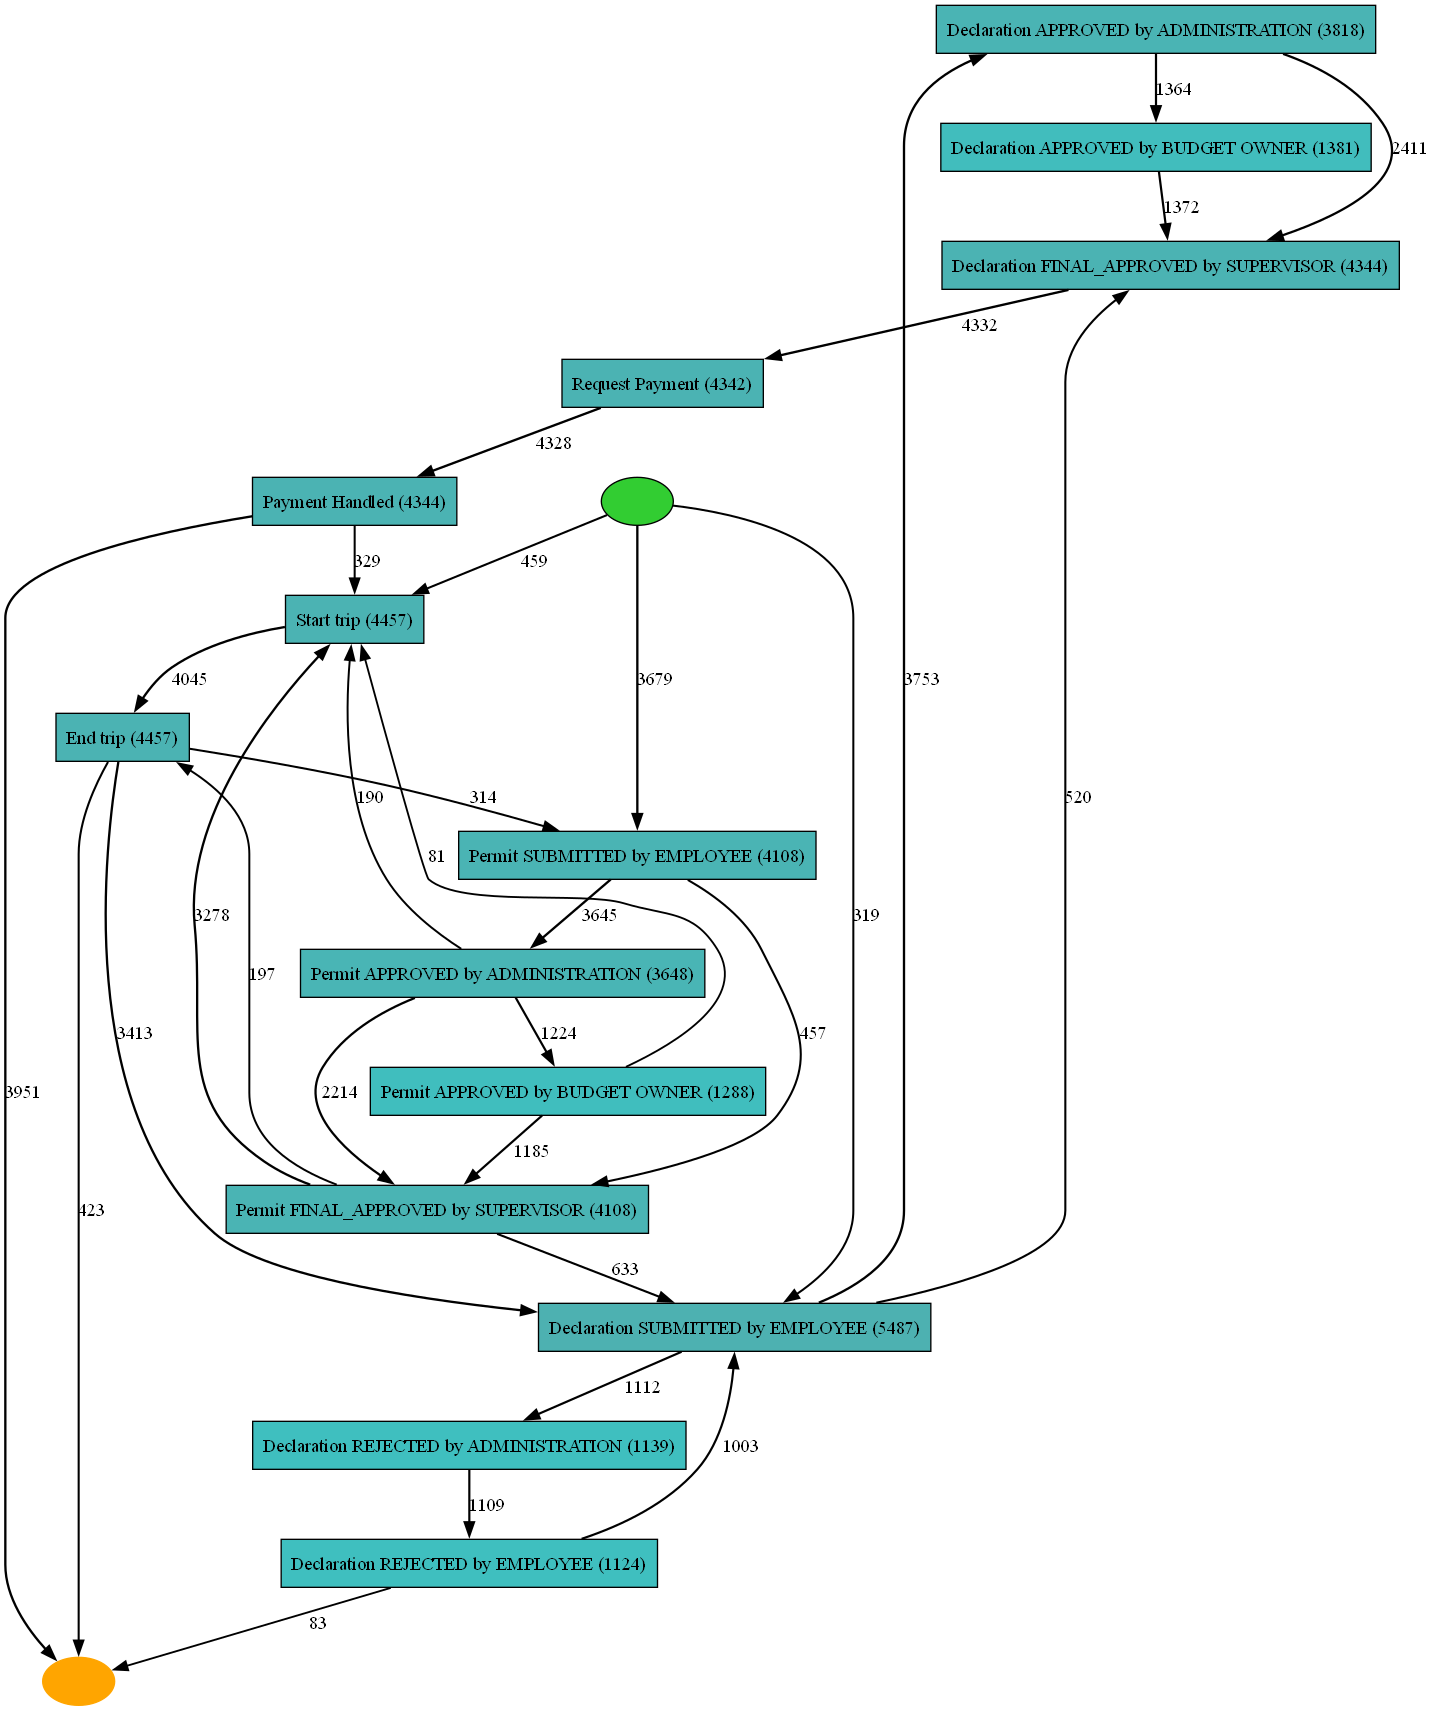

In [ ]:
# Heuristic Miner (HM)

# Discover the HM-map of the original DF and visualise it
map = pm4py.discover_heuristics_net(df)
pm4py.view_heuristics_net(map)

# Discover the HM-map of the filtered DF and visualise it
map = pm4py.discover_heuristics_net(df_cleaned)
pm4py.view_heuristics_net(map)

In [25]:
# Export the cleaned DataFrame to an XES file

"""
log_name_for_file = "InternationalDeclarations_cleaned.xes"
log = pm4py.convert_to_event_log(df_cleaned,
                                 case_id_key='case:id',
                                 activity_key='concept:name',
                                 timestamp_key='time:timestamp')

pm4py.write_xes(log, log_name_for_file)

print(f"Log succesfully exported in: {log_name_for_file}")
"""

'\nlog_name_for_file = "InternationalDeclarations_cleaned.xes"\nlog = pm4py.convert_to_event_log(df_cleaned,\n                                 case_id_key=\'case:id\',\n                                 activity_key=\'concept:name\',\n                                 timestamp_key=\'time:timestamp\')\n\npm4py.write_xes(log, log_name_for_file)\n\nprint(f"Log succesfully exported in: {log_name_for_file}")\n'